In [1]:
import util as u
%load_ext autoreload
%autoreload 2

# import re

from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
# from sklearn.feature_extraction.text import TfidfVectorizer 
# from sklearn.naive_bayes import MultinomialNB

import pandas as pd

import text_processing as tp

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [8]:
import matplotlib.pyplot as plt

In [20]:
df = u.open_pkl('Data/all_lyrics_df_181109.pkl')
X = df[['Lyrics']].values
X = X.tolist()
X = [x[0] for x in X]

In [21]:
tf_df = u.open_pkl('Data/dtm_tf_df.pkl')
#     u.pkl_this('Data/word_frequ.pkl', word_frequs)
#     u.pkl_this('Data/cv_vocab.pkl', cv_vocab)
transX = u.open_pkl('Data/dtm_tf.pkl')


In [22]:
words_by_doc = np.sum(tf_df, axis=1)

### Histograms

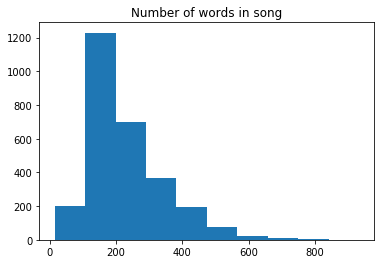

In [23]:
plt.hist(words_by_doc[words_by_doc > 2])
plt.title("Number of words in song");

In [24]:
unique_words_by_doc = tf_df.astype(bool).sum(axis=1)

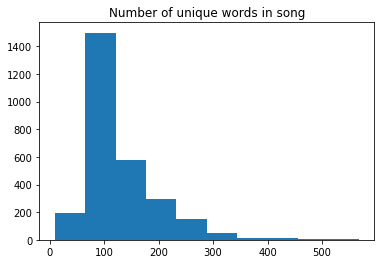

In [25]:
plt.hist(unique_words_by_doc[unique_words_by_doc > 2])
plt.title("Number of unique words in song");

In [26]:
length_by_doc = [len(doc) for doc in X]
length_by_doc = [x for x in length_by_doc if x > 5]

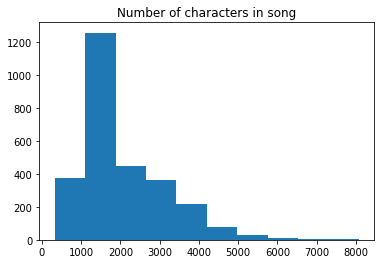

In [27]:
plt.hist(length_by_doc)
plt.title("Number of characters in song");

## Tf-Idf

In [273]:
vect2 = TfidfVectorizer(ngram_range=(1,2), encoding = 'ISO-8859-1', strip_accents='ascii', min_df = 2, max_df=0.95,
                             stop_words = tp.stop_words())

In [274]:
tf_X = vect2.fit_transform(X)

In [275]:
vocab_tfidf = vect2.get_feature_names()

In [276]:
tf_df = pd.DataFrame(tf_X.toarray(), columns=vect2.get_feature_names())

In [277]:
word_tfidfs = np.sum(tf_df)

## Number of songs by artist
**Need to maks sure this code is compatible**

In [28]:
artist_counts = df.groupby(['Genre','Artist'])['Song'].count()

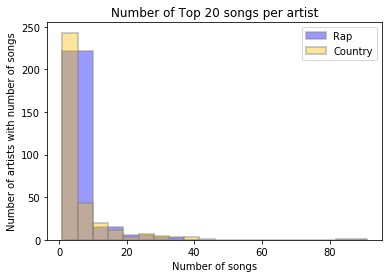

In [29]:
plt.hist(artist_counts['rap'].sort_values(ascending=False), color='blue', alpha=0.4, label='Rap',
        edgecolor='gray', linewidth=2)
plt.hist(artist_counts['country'].sort_values(ascending=False), color='xkcd:goldenrod', alpha=0.4, label='Country',
        edgecolor='gray', linewidth=2)
plt.title('Number of Top 20 songs per artist')
plt.xlabel('Number of songs')
plt.ylabel('Number of artists with number of songs')
plt.legend();